# Marketing Campaign: Augmenter les bénéfices d’une campagne de marketing

# Part 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl
import matplotlib.cm as cm

#ACP, normalization
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.decomposition import PCA
from functions import *
import prince

#Clustering
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

Mise en forme du Notebook

In [3]:
#Format des nombres:
pd.set_option('display.float_format', '{:.2f}'.format)

#Montrer toutes les colonnes:
pd.options.display.max_columns = None

## Table des matières

* [Télécharger le jeu de données](#chapter0)

* [2 Analyse en composantes principales](#chapter2)
    * [2.1 Analyse de corrélation et sélection des variables](#section_2_1)
    * [2.2 Analyse de l'éboulis des valeurs propres](#section_2_2)
    * [2.3 Représentation des variables par le cercle des corrélations](#section_2_3)
    * [2.4 Représentation des individus par les plans factoriels](#section_2_4)
    * [2.5 Qualité de représentation et la contribution des individus](#section_2_5)
        * [2.5.1 Qualité de représentation des individus sur les axes](#section_2_5_1)
        * [2.5.2 Contribution des individus aux axes (CTR)](#section_2_5_2)
    
* [3 Classification K-means](#chapter3)
    * [3.1 Trouver K](#section_3_1)
        * [3.1.1 Elbow Method](#section_3_1_1)
        * [3.1.2 Sélectionner le nombre de clusters avec l'analyse de silhouette](#section_3_1_2)    
    * [3.2 Modèle avec 2 groupes](#section_3_2)
    * [3.3 Analyse des clusters](#section_3_3)

## Télécharger le jeu de données <a class="anchor" id="chapter0"></a>

In [4]:
df_mkt = pd.read_csv('~/Documents/Python/OpenClassrooms/Projet_8/outputs/df_cmkt.csv')

In [5]:
df_mkt

,ID,Age,Education,Marital_Status,Childhome,Income,Kidhome,Teenhome,Days_Engaged,Recency,MntTotal,Wines,Fruits,Meat,Fish,Sweets,Gold,TotalPurch,DealsPurch,WebPurch,CatalogPurch,StorePurch,NumWebVisitsMonth,TotalAcc,AccCmp3,AccCmp4,AccCmp5,AccCmp1,AccCmp2,Complain,Response
0,5524,58,Graduation,Single,0,58138.00,0,0,849,58,1617,635,88,546,172,88,88,22,3,8,10,4,7,0,0,0,0,0,0,0,1
1,2174,61,Graduation,Single,2,46344.00,1,1,299,38,27,11,1,6,2,1,6,4,2,1,1,2,5,0,0,0,0,0,0,0,0
2,4141,50,Graduation,Together,0,71613.00,0,0,498,26,776,426,49,127,111,21,42,20,1,8,2,10,4,0,0,0,0,0,0,0,0
3,6182,31,Graduation,Together,1,26646.00,1,0,325,26,53,11,4,20,10,3,5,6,2,2,0,4,6,0,0,0,0,0,0,0,0
4,5324,34,PhD,Married,1,58293.00,1,0,347,94,422,173,43,118,46,27,15,14,5,5,3,6,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,10870,48,Graduation,Married,1,61223.00,0,1,567,46,1341,709,43,182,42,118,247,16,2,9,3,4,5,0,0,0,0,0,0,0,0
2198,4001,69,PhD,Together,3,64014.00,2,1,205,56,444,406,0,30,0,0,8,15,7,8,2,5,7,1,0,0,0,1,0,0,0
2199,7270,34,Graduation,Divorced,0,56981.00,0,0,341,91,1241,908,48,217,32,12,24,18,1,2,3,13,6,1,0,1,0,0,0,0,0
2200,8235,59,Master,Together,1,69245.00,0,1,342,8,843,428,30,214,80,30,61,21,2,6,5,10,3,0,0,0,0,0,0,0,0


In [6]:
df_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2202 non-null   int64  
 1   Age                2202 non-null   int64  
 2   Education          2202 non-null   object 
 3   Marital_Status     2202 non-null   object 
 4   Childhome          2202 non-null   int64  
 5   Income             2202 non-null   float64
 6   Kidhome            2202 non-null   int64  
 7   Teenhome           2202 non-null   int64  
 8   Days_Engaged       2202 non-null   int64  
 9   Recency            2202 non-null   int64  
 10  MntTotal           2202 non-null   int64  
 11  Wines              2202 non-null   int64  
 12  Fruits             2202 non-null   int64  
 13  Meat               2202 non-null   int64  
 14  Fish               2202 non-null   int64  
 15  Sweets             2202 non-null   int64  
 16  Gold               2202 

In [7]:
df_mkt['ID'] = df_mkt['ID'].astype(str)

## 2- Analyse en composantes principales <a class="anchor" id="chapter2"></a>

### 2.1 Analyse de corrélation et sélection des variables <a class="anchor" id="section_2_1"></a>

In [8]:
df_mkt.corr('pearson')

,Age,Childhome,Income,Kidhome,Teenhome,Days_Engaged,Recency,MntTotal,Wines,Fruits,Meat,Fish,Sweets,Gold,TotalPurch,DealsPurch,WebPurch,CatalogPurch,StorePurch,NumWebVisitsMonth,TotalAcc,AccCmp3,AccCmp4,AccCmp5,AccCmp1,AccCmp2,Complain,Response
Age,1.00,0.09,0.21,-0.24,0.36,-0.01,0.01,0.12,0.16,0.01,0.04,0.04,0.02,0.06,0.18,0.08,0.16,0.14,0.14,-0.12,0.00,-0.06,0.07,-0.02,0.01,0.01,0.00,-0.02
Childhome,0.09,1.00,-0.35,0.69,0.70,-0.02,0.02,-0.50,-0.36,-0.40,-0.51,-0.43,-0.39,-0.27,-0.39,0.47,-0.15,-0.46,-0.33,0.43,-0.25,-0.02,-0.09,-0.29,-0.23,-0.07,0.03,-0.17
Income,0.21,-0.35,1.00,-0.53,0.04,-0.03,0.01,0.82,0.73,0.54,0.70,0.55,0.56,0.42,0.78,-0.12,0.50,0.71,0.69,-0.65,0.39,-0.01,0.23,0.42,0.35,0.11,-0.03,0.17
Kidhome,-0.24,0.69,-0.53,1.00,-0.04,-0.06,0.01,-0.56,-0.50,-0.37,-0.45,-0.39,-0.38,-0.36,-0.58,0.24,-0.38,-0.52,-0.51,0.46,-0.21,0.02,-0.16,-0.21,-0.17,-0.08,0.04,-0.08
Teenhome,0.36,0.70,0.04,-0.04,1.00,0.02,0.01,-0.14,0.00,-0.18,-0.27,-0.21,-0.16,-0.02,0.04,0.41,0.16,-0.11,0.05,0.14,-0.13,-0.04,0.04,-0.19,-0.15,-0.02,0.01,-0.16
Days_Engaged,-0.01,-0.02,-0.03,-0.06,0.02,1.00,0.03,0.16,0.17,0.07,0.09,0.08,0.08,0.16,0.16,0.23,0.19,0.10,0.11,0.29,-0.01,-0.01,0.02,-0.00,-0.04,0.01,0.04,0.20
Recency,0.01,0.02,0.01,0.01,0.01,0.03,1.00,0.02,0.02,-0.00,0.03,0.00,0.03,0.02,0.01,-0.00,-0.00,0.03,0.00,-0.02,-0.01,-0.03,0.02,0.00,-0.02,-0.00,0.01,-0.20
MntTotal,0.12,-0.50,0.82,-0.56,-0.14,0.16,0.02,1.00,0.90,0.61,0.86,0.64,0.61,0.53,0.82,-0.07,0.53,0.80,0.68,-0.51,0.46,0.05,0.25,0.47,0.38,0.14,-0.03,0.27
Wines,0.16,-0.36,0.73,-0.50,0.00,0.17,0.02,0.90,1.00,0.38,0.59,0.40,0.39,0.39,0.76,0.02,0.55,0.67,0.64,-0.33,0.51,0.06,0.37,0.47,0.35,0.21,-0.04,0.25
Fruits,0.01,-0.40,0.54,-0.37,-0.18,0.07,-0.00,0.61,0.38,1.00,0.57,0.59,0.57,0.39,0.52,-0.14,0.30,0.51,0.46,-0.43,0.15,0.01,0.01,0.21,0.19,-0.01,-0.00,0.12


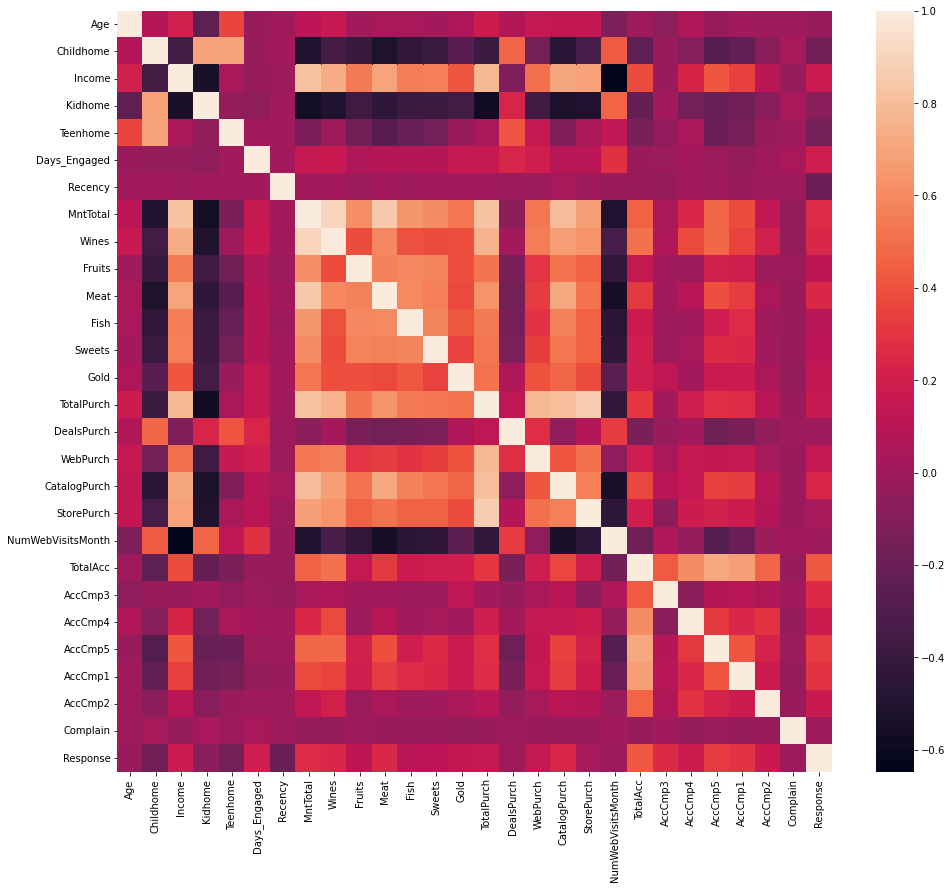

In [9]:
# calculate the correlation matrix
corr = df_mkt.corr('pearson')

# plot the heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns);
#plt.savefig('correlation_matrix.png', bbox_inches='tight');

In [10]:
# Create correlation matrix
corr_mat = df_mkt.corr(method='pearson')
  
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()

print(sorted_mat.head(15))
print('')
print('')
print(sorted_mat.tail(15))

NumWebVisitsMonth  Income         -0.65
TotalPurch         Kidhome        -0.58
MntTotal           Kidhome        -0.56
NumWebVisitsMonth  Meat           -0.55
                   CatalogPurch   -0.54
Kidhome            Income         -0.53
CatalogPurch       Kidhome        -0.52
Meat               Childhome      -0.51
StorePurch         Kidhome        -0.51
NumWebVisitsMonth  MntTotal       -0.51
MntTotal           Childhome      -0.50
Wines              Kidhome        -0.50
NumWebVisitsMonth  Fish           -0.46
CatalogPurch       Childhome      -0.46
NumWebVisitsMonth  StorePurch     -0.45
dtype: float64


Meat          Income       0.70
CatalogPurch  Income       0.71
              Meat         0.71
AccCmp5       TotalAcc     0.72
Wines         Income       0.73
TotalPurch    Wines        0.76
WebPurch      TotalPurch   0.78
TotalPurch    Income       0.78
CatalogPurch  MntTotal     0.80
              TotalPurch   0.80
TotalPurch    MntTotal     0.82
MntTotal      Income       0.82

<ipython-input-10-dadbd7de2434>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))


In [11]:
feat_n = ['Age',
 'Days_Engaged',
 'Recency',
 #'MntTotal',
 'Wines',
 'Fruits',
 'Meat',
 'Fish',
 'Sweets',
 'Gold',
 'TotalPurch',
 'DealsPurch',
 'WebPurch',
 'CatalogPurch',
 'StorePurch',
 'NumWebVisitsMonth',
 'TotalAcc',
 'Income']
feat_c = ['Childhome',
 'Kidhome',
 'Teenhome',
 'AccCmp1',
 'AccCmp2',
 'AccCmp3',
 'AccCmp4',
 'AccCmp5',
 'Complain',
 'Education_Grad_Bas',
 'Education_Master',
 'Education_PhD',
 'Marital_Status_Divorced',         
 'Marital_Status_Marr_Tog',
 'Marital_Status_Single',
 'Marital_Status_Widow']

In [12]:
df_scaled = df_mkt.drop(['MntTotal', 'Response', 'AccCmp1', 'AccCmp2', 'AccCmp3', 'AccCmp4', 'AccCmp5',
                               'Complain'], 1)

df_targets = df_mkt[['Response', 'AccCmp1', 'AccCmp2', 'AccCmp3', 'AccCmp4', 'AccCmp5',
                               'Complain']]

for col in list(df_scaled.select_dtypes(exclude=['object']).columns):
    df_scaled.loc[:,col] = preprocessing.StandardScaler().fit_transform(np.array(df_scaled[col]).reshape(-1, 1)).flatten()
    
df_a = pd.concat([df_scaled, df_targets], axis=1)

df_ad = pd.get_dummies(df_a, columns=["Education", "Marital_Status"], drop_first=True)

In [13]:
df_ad1 = df_ad[feat_n]

In [14]:
df_ad1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2202 non-null   float64
 1   Days_Engaged       2202 non-null   float64
 2   Recency            2202 non-null   float64
 3   Wines              2202 non-null   float64
 4   Fruits             2202 non-null   float64
 5   Meat               2202 non-null   float64
 6   Fish               2202 non-null   float64
 7   Sweets             2202 non-null   float64
 8   Gold               2202 non-null   float64
 9   TotalPurch         2202 non-null   float64
 10  DealsPurch         2202 non-null   float64
 11  WebPurch           2202 non-null   float64
 12  CatalogPurch       2202 non-null   float64
 13  StorePurch         2202 non-null   float64
 14  NumWebVisitsMonth  2202 non-null   float64
 15  TotalAcc           2202 non-null   float64
 16  Income             2202 

In [15]:
# choix du nombre de composantes à calculer
n_a2 = df_ad1.shape[1]

# préparation des données pour l'ACP
features_a2 = df_ad1.columns
valeurs_a2 = df_ad1.values
names_a2 = df_ad1.index

### 2.2 Analyse de l'éboulis des valeurs propres <a class="anchor" id="section_2_2"></a>

Les valeurs propres (eigenvalues en anglais) mesurent la quantité de variance expliquée par chaque axe principal. Les valeurs propres sont grandes pour les premiers axes et petits pour les axes suivants. Autrement dit, les premiers axes correspondent aux directions portant la quantité maximale de variation contenue dans le jeu de données.

Nous examinons les valeurs propres pour déterminer le nombre de composantes principales à prendre en considération.

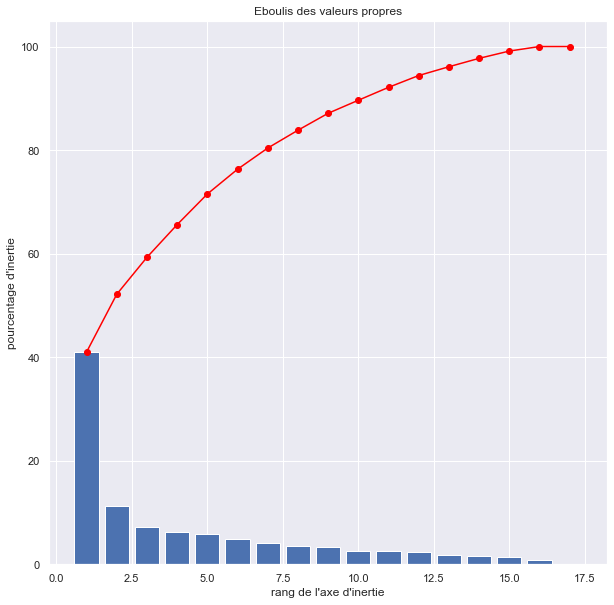

In [16]:
# choix du nombre de composantes à calculer
n_a = df_ad1.shape[1]

# préparation des données pour l'ACP
features_a = df_ad1.columns
valeurs_a = df_ad1.values
names_a = df_ad1.index

# Calcul des composantes principales
pca_a = decomposition.PCA(n_components=n_a)
pca_a.fit(valeurs_a)

sns.set()

# Eboulis des valeurs propres
scree = pca_a.explained_variance_ratio_*100
plt.figure(figsize=(10, 10))
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
#plt.savefig('eboulis.png', bbox_inches='tight')
plt.show(block=False)

La variation est expliquée par la première valeur propre est de 41%. Le pourcentage cumulé expliqué est obtenu en ajoutant les proportions successives de variances expliquées. Par exemple, 41% plus 11.2% sont égaux à 52.2%, et ainsi de suite. Par conséquent, environ 52% de la variance totale est expliquée par les deux premières valeurs propres.

Bien qu'il n’existe pas de méthode objective bien acceptée pour décider du nombre d’axes principaux qui suffisent, nous décidons de limiter le nombre d’axes avec l'étude de la courbe de décroissance des valeurs propres. L’idée est de détecter les « coudes » (les « cassures ») signalant un changement de structure. Dans ce cas, il semble y avoir le coude en k = 2.

### 2.3 Représentation des variables par le cercle des corrélations <a class="anchor" id="section_2_3"></a>

La corrélation entre une variable et une composante principale (PC) est utilisée comme coordonnées de la variable sur la composante principale. La représentation des variables diffère de celle des observations: les observations sont représentées par leurs projections, mais les variables sont représentées par leurs corrélations (Abdi and Williams 2010).

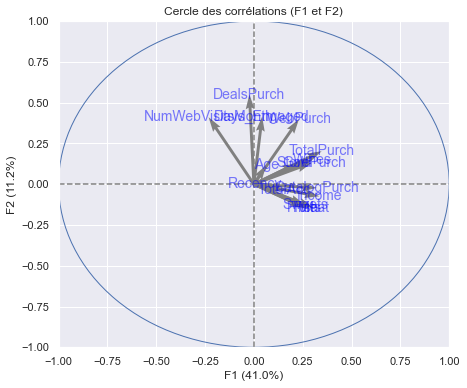

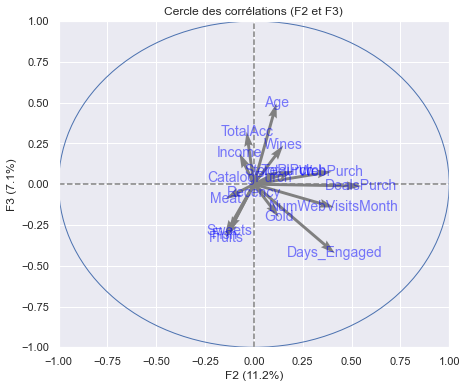

In [17]:
# Cercle des corrélations
pcs_cust = pca_a.components_
display_circles(pcs_cust, n_a, pca_a, [(0,1),(1,2)], labels = np.array(features_a))

In [18]:
f1_ = pca_a.components_[0]
f1_

array([ 0.06314708,  0.04234109,  0.00701532,  0.29978065,  0.25892329,
        0.30428952,  0.26792516,  0.2613299 ,  0.22029872,  0.34726509,
       -0.02293622,  0.23063739,  0.32164382,  0.29629718, -0.23180422,
        0.15626443,  0.33518452])

- F1 

| Variable | Corrélation |
| :---: | :---: |
|    TotalPurch | 0.34727 |
|    Income | 0.33518 |
|    CatalogPurch | 0.32164 |
|    Meat | 0.30429 |

### 2.4 Représentation des individus par les plans factoriels <a class="anchor" id="section_2_4"></a>

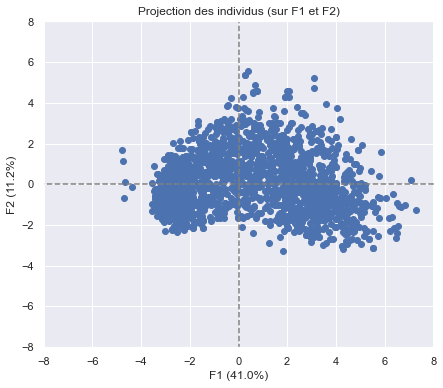

In [19]:
# Projection des individus
X_projected_a = pca_a.transform(df_ad1)
display_factorial_planes(X_projected_a, n_a, pca_a, [(0,1)])#, labels = np.array(names_cust))

plt.show()

In [20]:
#Création du df avec les coordonées des facteurs
a_F = pd.DataFrame(X_projected_a[:,[0, 1]], index=names_a, columns=["F"+str(i+1) for i in range(2)])
a_F

,F1,F2
0,3.91,1.18
1,-2.47,-1.15
2,1.91,0.04
3,-2.71,-0.91
4,-0.02,0.23
...,...,...
2197,2.54,0.96
2198,-0.30,2.10
2199,1.42,-0.55
2200,2.18,-0.23


In [21]:
#On ajoute la variable 'Response' pour la plotter dans le plan factoriel
resp_assign = df_mkt[['Response']]
a_F_R = a_F.assign(Response=resp_assign[['Response']])
a_F_R

,F1,F2,Response
0,3.91,1.18,1
1,-2.47,-1.15,0
2,1.91,0.04,0
3,-2.71,-0.91,0
4,-0.02,0.23,0
...,...,...,...
2197,2.54,0.96,0
2198,-0.30,2.10,0
2199,1.42,-0.55,0
2200,2.18,-0.23,0


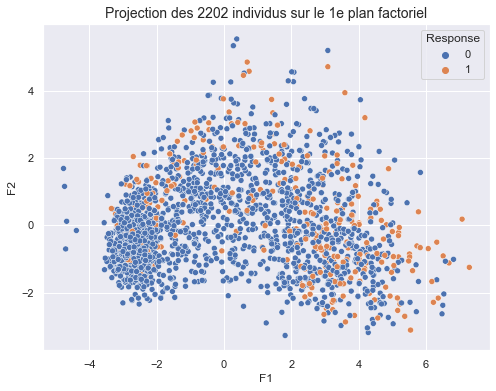

In [22]:
#PLot des individus divisés par la variable is genuine
fig, ax = plt.subplots(figsize=(8,6))

ax = sns.scatterplot(x='F1',
                     y='F2',
                     hue = 'Response',
                     data = a_F_R,
                     legend='full')

plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected_a.shape[0]), fontsize=14)
#plt.xlabel("F1 (47,4%)", fontsize=12)
#plt.ylabel("F2 (22,0%)", fontsize=12)
plt.savefig('1PF_individus.png', bbox_inches='tight');

### 2.5 Qualité de représentation et la contribution des individus <a class="anchor" id="section_2_5"></a>

Pour calculer la qualité de représentation des individus sur les axes, nous devons d’abord calculer les carrés des distances à l’origine des individus, qui correspondent également à leur contribution dans l’inertie totale.

In [23]:
#contribution des individus dans l'inertie totale

di = np.sum(valeurs_a**2,axis=1) 
df_di = pd.DataFrame({'ID':df_ad.index,'d_i':di})
df_di

,ID,d_i
0,0,30.67
1,1,11.05
2,2,9.82
3,3,10.56
4,4,7.77
...,...,...
2197,2197,26.13
2198,2198,19.73
2199,2199,15.77
2200,2200,11.20


#### 2.5.1 Qualité de représentation des individus sur les axes <a class="anchor" id="section_2_5_1"></a>

La qualité de représentation des individus sur la carte de l’ACP s’appelle cos2 (cosinus carré). 

In [24]:
#qualité de représentation des individus - COS2
cos2 = X_projected_a**2
for j in range(n_a):
    cos2[:,j] = cos2[:,j]/di
df_cos2 = pd.DataFrame({'COS2_1':cos2[:,0],
                     'COS2_2':cos2[:,1]})
df_cos2

,COS2_1,COS2_2
0,0.50,0.05
1,0.55,0.12
2,0.37,0.00
3,0.69,0.08
4,0.00,0.01
...,...,...
2197,0.25,0.04
2198,0.00,0.22
2199,0.13,0.02
2200,0.42,0.00


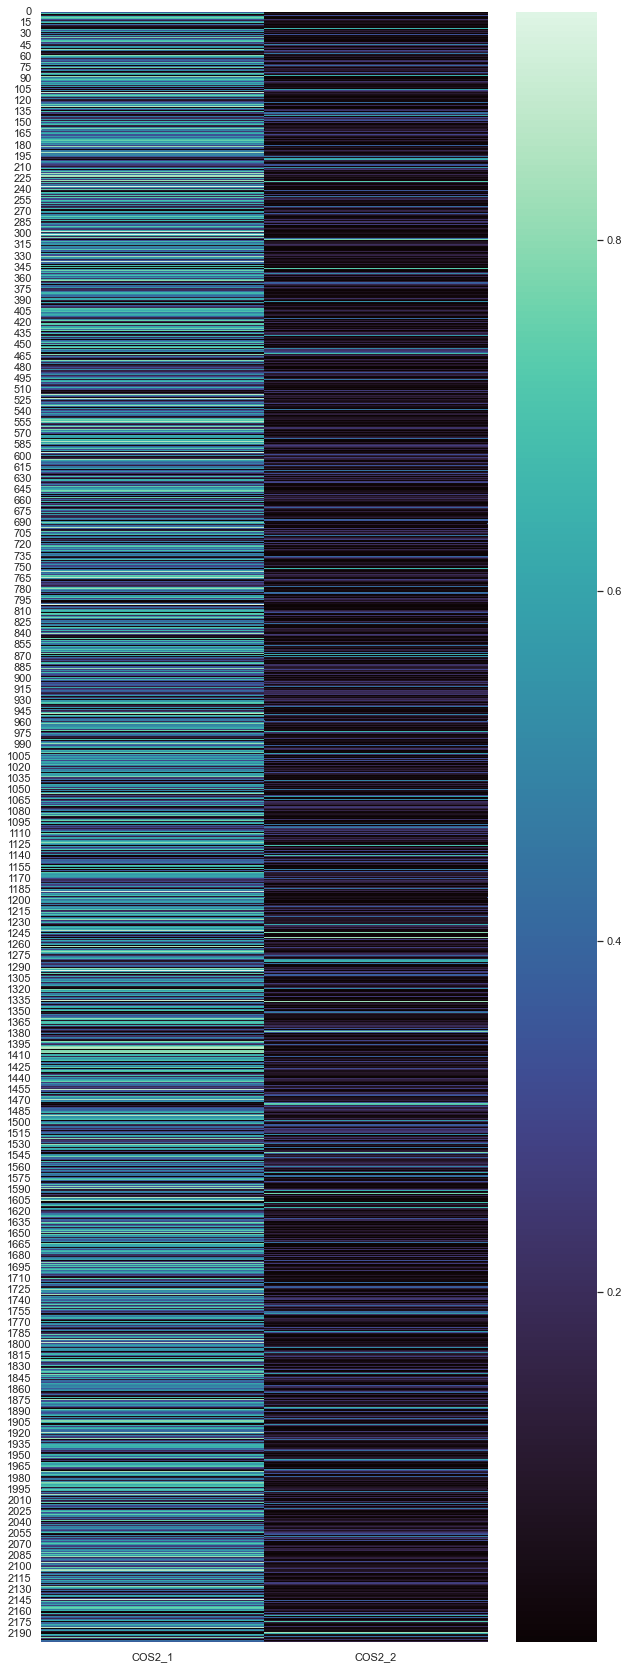

In [25]:
#qualité de représentation des individus - COS2
fig, ax = plt.subplots(figsize=(10,30))
sns.heatmap(df_cos2, cmap="mako");
#plt.savefig('ACP_QRI.png', bbox_inches='tight');

La mayorité des individus est expliqué pour la première axe.

#### 2.5.2 Contribution des individus aux axes (CTR) <a class="anchor" id="section_2_5_2"></a>

Elles permettent de déterminer les individus qui pèsent le plus dans la définition de chaque facteur.

In [26]:
#contributions aux axes
ctr = X_projected_a**2
for j in range(n_a):
    ctr[:,j] = ctr[:,j]/(2212*pca_a.explained_variance_ratio_[j])

df_ctr = pd.DataFrame({'CTR_1':ctr[:,0],
                     'CTR_2':ctr[:,1]})

df_ctr

,CTR_1,CTR_2
0,0.02,0.01
1,0.01,0.01
2,0.00,0.00
3,0.01,0.00
4,0.00,0.00
...,...,...
2197,0.01,0.00
2198,0.00,0.02
2199,0.00,0.00
2200,0.01,0.00


In [27]:
df_ctr.describe()

,CTR_1,CTR_2
count,2202.00,2202.00
mean,0.01,0.01
std,0.01,0.01
min,0.00,0.00
25%,0.00,0.00
50%,0.01,0.00
75%,0.01,0.01
max,0.06,0.12


In [28]:
#id_list = merge_analyse[['ID']].reset_index()
#id_list.drop('index', 1, inplace=True)
df_ctr['ID'] = df_di['ID']
df_ctr = df_ctr.set_index('ID')

In [29]:
df_ctr

,CTR_1,CTR_2
ID,,
0,0.02,0.01
1,0.01,0.01
2,0.00,0.00
3,0.01,0.00
4,0.00,0.00
...,...,...
2197,0.01,0.00
2198,0.00,0.02
2199,0.00,0.00


In [30]:
#Merge pour faire un plot dans le plan factoriel
df_ctr_f = pd.merge(df_ctr, a_F, how='left', left_index=True, right_index=True)
df_ctr_f

,CTR_1,CTR_2,F1,F2
ID,,,,
0,0.02,0.01,3.91,1.18
1,0.01,0.01,-2.47,-1.15
2,0.00,0.00,1.91,0.04
3,0.01,0.00,-2.71,-0.91
4,0.00,0.00,-0.02,0.23
...,...,...,...,...
2197,0.01,0.00,2.54,0.96
2198,0.00,0.02,-0.30,2.10
2199,0.00,0.00,1.42,-0.55


In [31]:
df_ctr_f.describe()

,CTR_1,CTR_2,F1,F2
count,2202.00,2202.00,2202.00,2202.00
mean,0.01,0.01,-0.00,-0.00
std,0.01,0.01,2.64,1.38
min,0.00,0.00,-4.77,-3.28
25%,0.00,0.00,-2.50,-1.00
50%,0.01,0.00,-0.61,-0.20
75%,0.01,0.01,2.30,0.86
max,0.06,0.12,7.29,5.55


In [32]:
df_ctr_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2202 entries, 0 to 2201
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CTR_1   2202 non-null   float64
 1   CTR_2   2202 non-null   float64
 2   F1      2202 non-null   float64
 3   F2      2202 non-null   float64
dtypes: float64(4)
memory usage: 150.6 KB


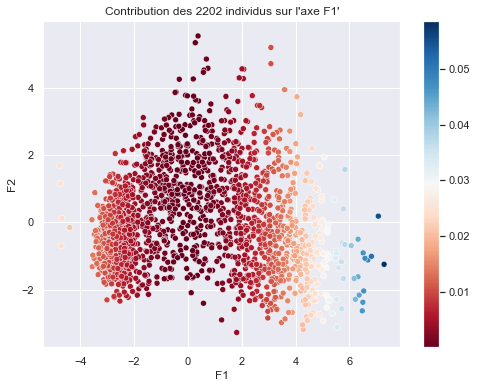

In [33]:
#Contribution des individus sur l'axe F1
fig, ax = plt.subplots(figsize=(8,6))

ax = sns.scatterplot(x='F1',
                     y='F2',
                     hue = 'CTR_1',
                     data = df_ctr_f,
                     legend='full',
                     palette='RdBu')

ax.title.set_text("Contribution des {} individus sur l'axe F1'".format(X_projected_a.shape[0]))

norm = plt.Normalize(df_ctr_f['CTR_1'].min(), df_ctr_f['CTR_1'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm);

#plt.savefig('ACP_CI_F1.png', bbox_inches='tight');

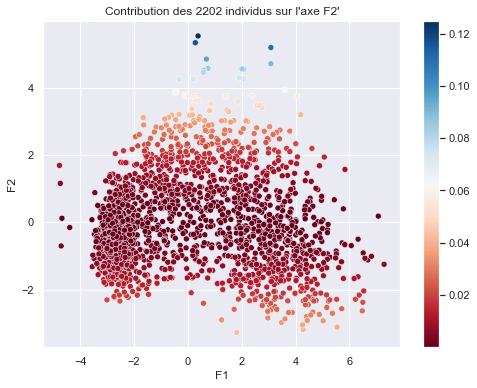

In [34]:
#Contribution des individus sur l'axe F2
fig, ax = plt.subplots(figsize=(8,6))

ax = sns.scatterplot(x='F1',
                     y='F2',
                     hue = 'CTR_2',
                     data = df_ctr_f,
                     legend='full',
                     palette='RdBu')

ax.title.set_text("Contribution des {} individus sur l'axe F2'".format(X_projected_a.shape[0]))

norm = plt.Normalize(df_ctr_f['CTR_2'].min(), df_ctr_f['CTR_2'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm);

#plt.savefig('ACP_CI_F2.png', bbox_inches='tight');

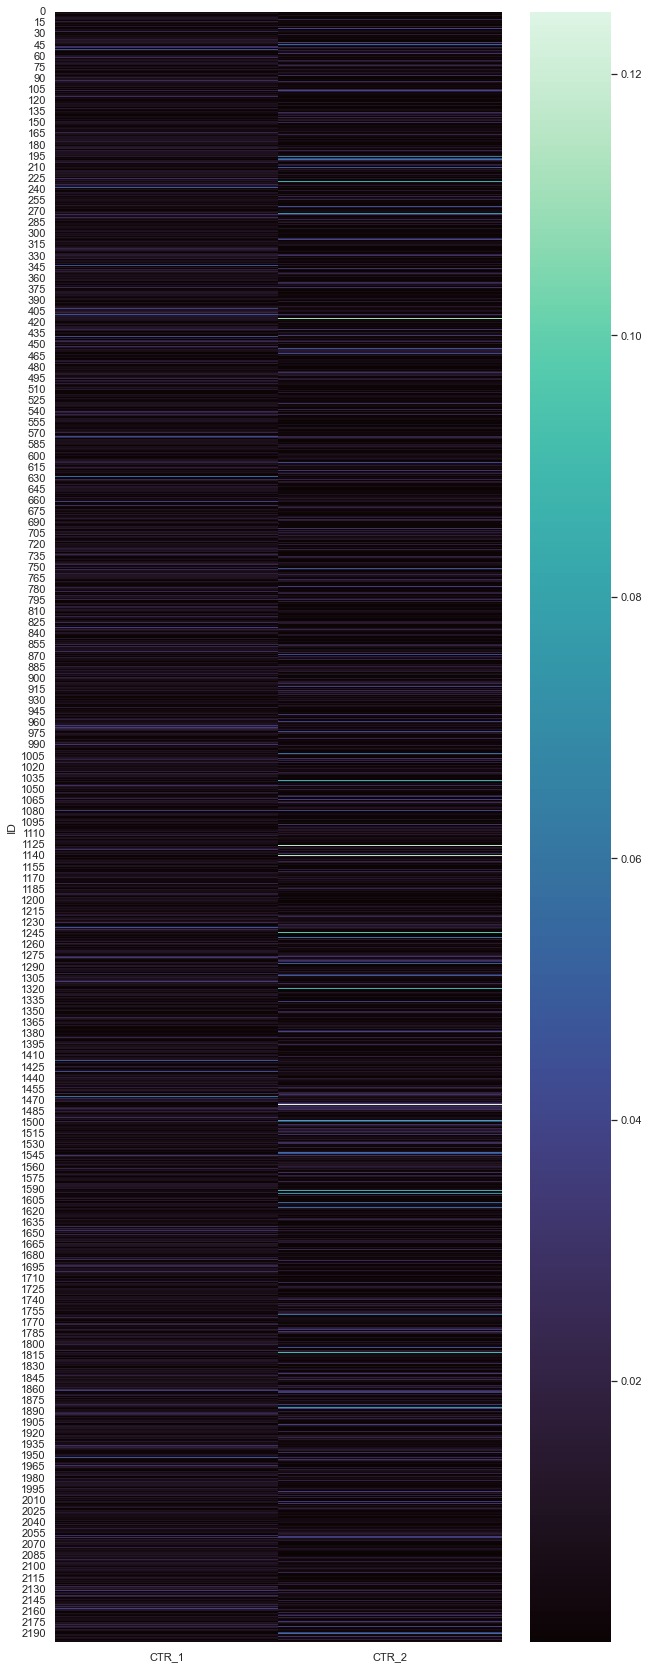

In [35]:
#Contribution des individus dans les variables
fig, ax = plt.subplots(figsize=(10,30))
sns.heatmap(df_ctr, cmap="mako");
#plt.savefig('ACP_CI.png', bbox_inches='tight');

In [36]:
df_ctr['CTR_1'].sort_values(ascending=False).head(10)

ID
1465   0.06
628    0.06
1574   0.05
238    0.05
1417   0.05
1237   0.05
1266   0.05
1953   0.05
409    0.05
1840   0.04
Name: CTR_1, dtype: float64

In [37]:
df_ctr['CTR_2'].sort_values(ascending=False).head(10)

ID
1476   0.12
1126   0.12
1140   0.12
415    0.11
1244   0.10
1811   0.09
1319   0.09
1039   0.09
1592   0.08
230    0.08
Name: CTR_2, dtype: float64

## 3 Classification K-means <a class="anchor" id="chapter3"></a>


Appliquer un algorithme de classification, puis analyser le résultat obtenu.

Visualiser la partition obtenue dans le premier plan factoriel de l'ACP, puis l'analyser.

### 3.1 Trouver K  <a class="anchor" id="section_3_1"></a>

#### 3.1.1 Elbow Method <a class="anchor" id="section_3_1_1"></a>

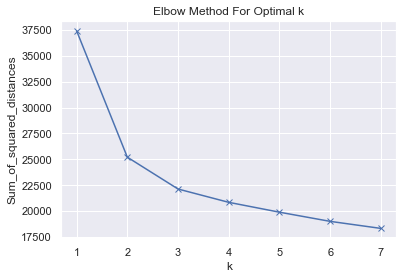

In [38]:
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(valeurs_a2)
    Sum_of_squared_distances.append(km.inertia_)
    
#Plot
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### 3.1.2 Selectioner le nombre de clusters avec l'analyse de silhouette <a class="anchor" id="section_3_1_2"></a>

En partitionnement de données (clustering), le coefficient de silhouette est une mesure de qualité d'une partition d'un ensemble de données en classification automatique. Pour chaque point, son coefficient de silhouette est la différence entre la distance moyenne avec les points du même groupe que lui (cohésion) et la distance moyenne avec les points des autres groupes voisins (séparation). Si cette différence est négative, le point est en moyenne plus proche du groupe voisin que du sien : il est donc mal classé. À l'inverse, si cette différence est positive, le point est en moyenne plus proche de son groupe que du groupe voisin : il est donc bien classé.

Le coefficient de silhouette proprement dit est la moyenne du coefficient de silhouette pour tous les points.

Pour n_clusters = 2 Le coefficient de silhouette est : 0.31974051036131235
Pour n_clusters = 3 Le coefficient de silhouette est : 0.2388208665439618
Pour n_clusters = 4 Le coefficient de silhouette est : 0.23159336428730934
Pour n_clusters = 5 Le coefficient de silhouette est : 0.2067578530253392
Pour n_clusters = 6 Le coefficient de silhouette est : 0.11412914865925834
Pour n_clusters = 7 Le coefficient de silhouette est : 0.11401283197437012
Pour n_clusters = 8 Le coefficient de silhouette est : 0.11450682628142445


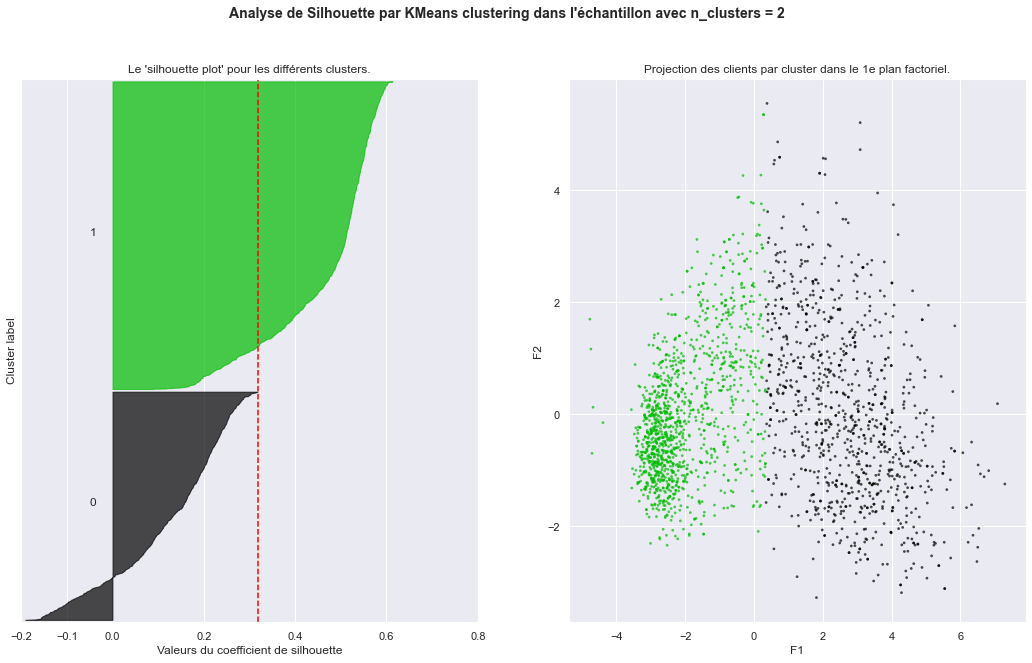

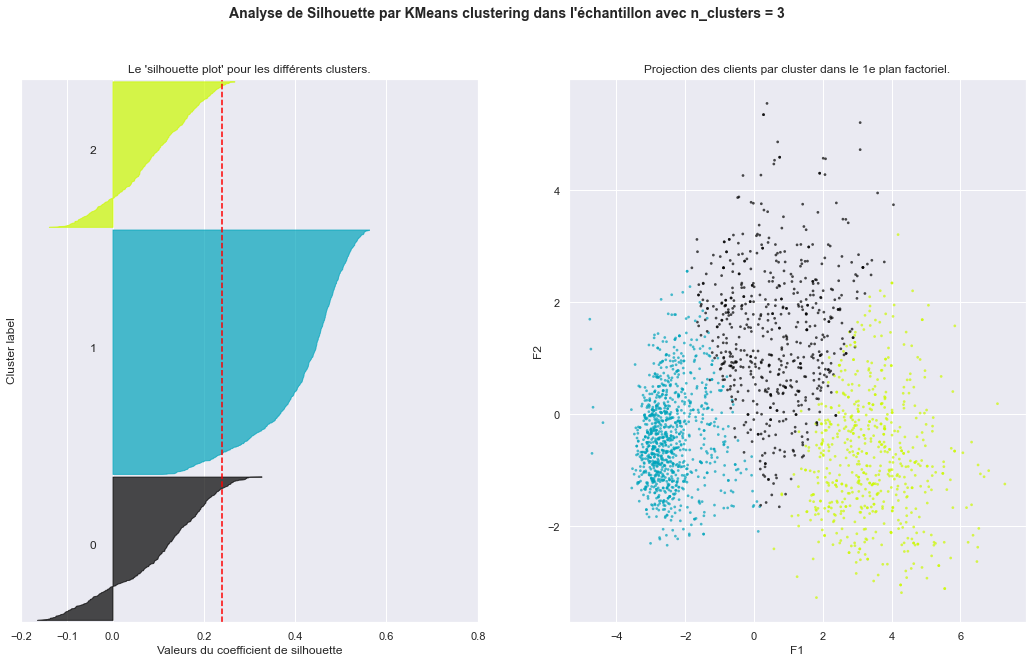

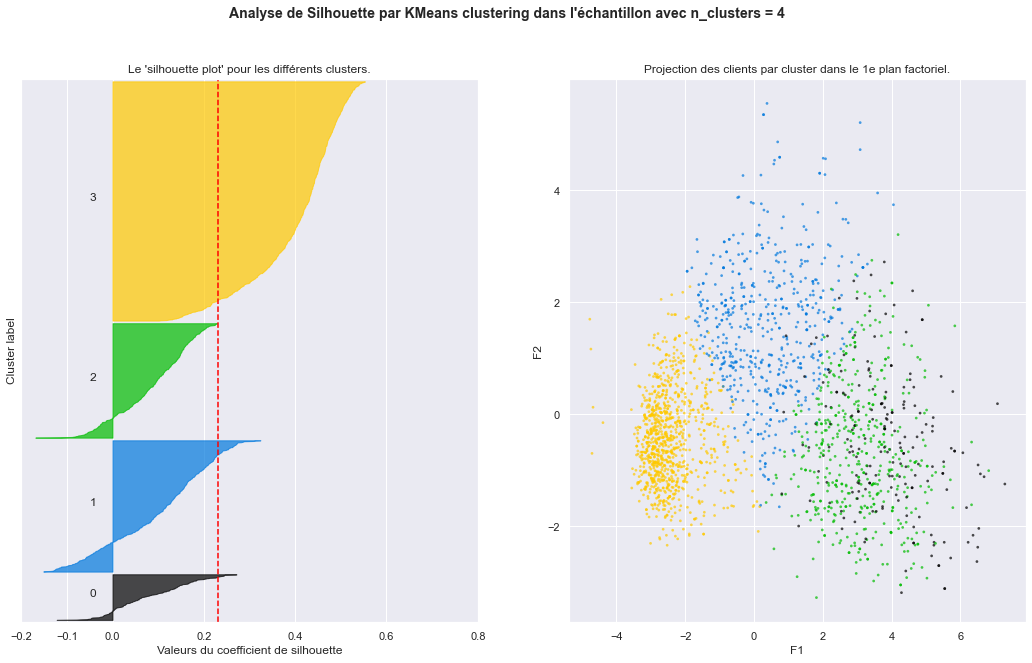

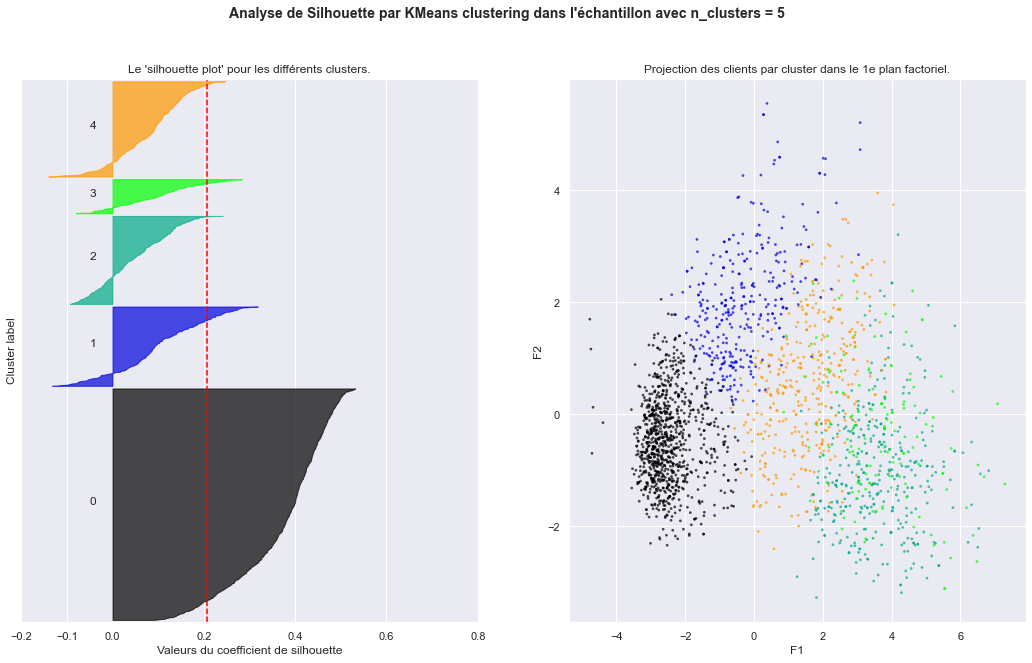

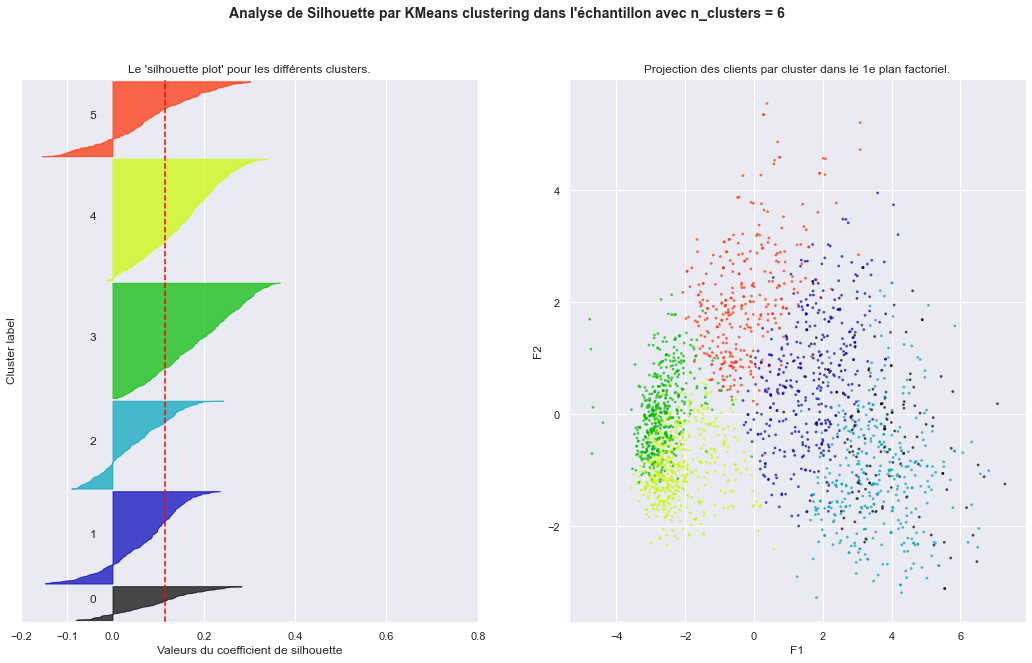

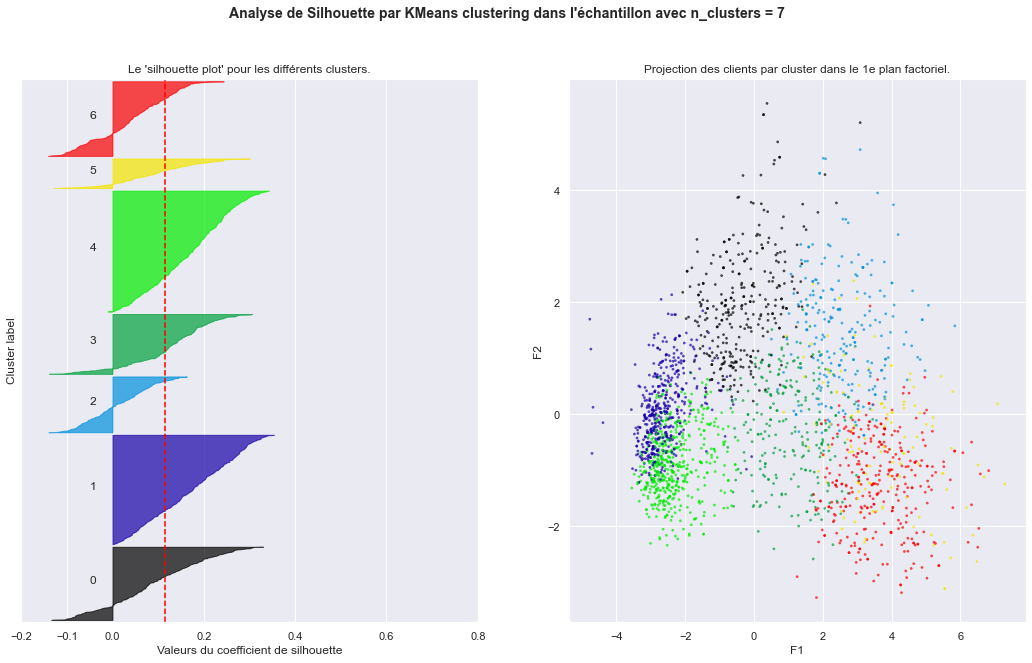

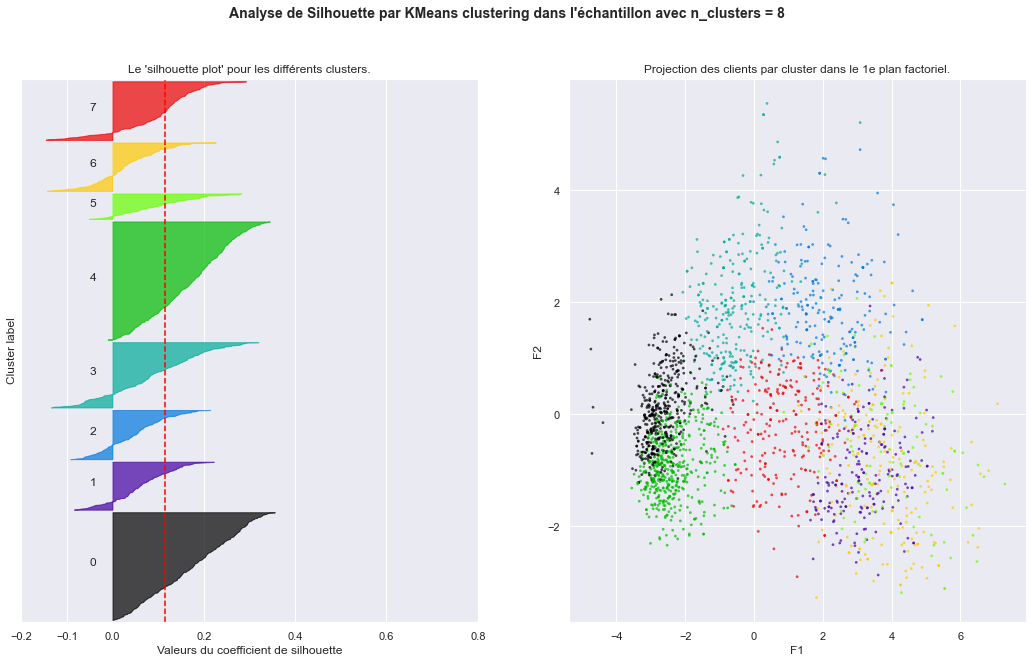

In [39]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.2, 0.8])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(valeurs_a2) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(valeurs_a2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(valeurs_a2, cluster_labels)
    print(
        "Pour n_clusters =",
        n_clusters,
        "Le coefficient de silhouette est :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(valeurs_a2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Le 'silhouette plot' pour les différents clusters.")
    ax1.set_xlabel("Valeurs du coefficient de silhouette")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        a_F.loc[:, 'F1'], a_F.loc[:, 'F2'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("Projection des clients par cluster dans le 1e plan factoriel.")
    ax2.set_xlabel("F1")
    ax2.set_ylabel("F2")

    plt.suptitle(
        "Analyse de Silhouette par KMeans clustering dans l'échantillon avec n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### 3.2 Modèle avec 2 groupes  <a class="anchor" id="section_3_2"></a>

In [40]:
kmeans2 = KMeans(init="random",
                n_clusters=2,
                n_init=10,
                max_iter=300,
                random_state=42)

In [41]:
kmeans2.fit(valeurs_a2)

KMeans(init='random', n_clusters=2, random_state=42)

In [42]:
# le valeur SSE le plus petit.
kmeans2.inertia_

25209.029927307318

In [43]:
# Localisation final des centroîdes
kmeans2.cluster_centers_

array([[ 0.16779175,  0.11651993,  0.00447911,  0.87501429,  0.68777627,
         0.81456865,  0.69972975,  0.6857191 ,  0.59379032,  0.97194234,
        -0.10334824,  0.637841  ,  0.88453682,  0.84935199, -0.6298831 ,
         0.38527107,  0.91735743],
       [-0.12405456, -0.08614744, -0.00331157, -0.64693   , -0.50849809,
        -0.60224033, -0.51733574, -0.50697715, -0.43901085, -0.71859244,
         0.07640912, -0.47157913, -0.65397035, -0.62795692,  0.46569556,
        -0.28484496, -0.67823582]])

Enfin, les assignations de cluster sont stockées sous forme de tableau NumPy unidimensionnel dans kmeans.labels_.

In [44]:
k2 = kmeans2.labels_[:]

In [45]:
a2_F_k2 = a_F.copy()
a2_F_k2 = a2_F_k2.assign(Cluster=k2)
a2_F_k2

,F1,F2,Cluster
0,3.91,1.18,0
1,-2.47,-1.15,1
2,1.91,0.04,0
3,-2.71,-0.91,1
4,-0.02,0.23,1
...,...,...,...
2197,2.54,0.96,0
2198,-0.30,2.10,1
2199,1.42,-0.55,0
2200,2.18,-0.23,0


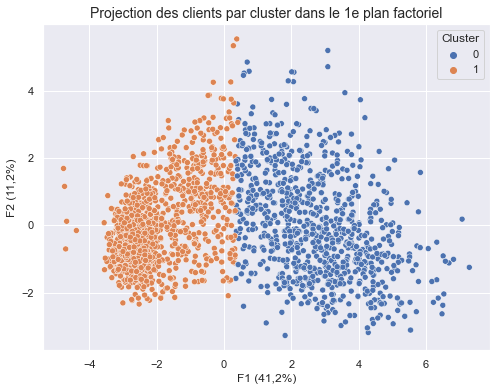

In [46]:
fig, ax = plt.subplots(figsize=(8,6))

ax = sns.scatterplot(x='F1',
                     y='F2',
                     hue = 'Cluster',
                     data = a2_F_k2,
                     legend='full')

plt.title("Projection des clients par cluster dans le 1e plan factoriel", fontsize=14)
plt.xlabel("F1 (41,2%)", fontsize=12)
plt.ylabel("F2 (11,2%)", fontsize=12)

plt.savefig('Graphiques/kmeans_pca.png', bbox_inches='tight');

In [47]:
# Vérifier la distribution des données entre 2 clusters.
np.unique(k2, return_counts=True)

(array([0, 1], dtype=int32), array([ 936, 1266]))

In [48]:
df_final = pd.merge(df_mkt, a2_F_k2, left_index=True, right_index=True)
df_final

,ID,Age,Education,Marital_Status,Childhome,Income,Kidhome,Teenhome,Days_Engaged,Recency,MntTotal,Wines,Fruits,Meat,Fish,Sweets,Gold,TotalPurch,DealsPurch,WebPurch,CatalogPurch,StorePurch,NumWebVisitsMonth,TotalAcc,AccCmp3,AccCmp4,AccCmp5,AccCmp1,AccCmp2,Complain,Response,F1,F2,Cluster
0,5524,58,Graduation,Single,0,58138.00,0,0,849,58,1617,635,88,546,172,88,88,22,3,8,10,4,7,0,0,0,0,0,0,0,1,3.91,1.18,0
1,2174,61,Graduation,Single,2,46344.00,1,1,299,38,27,11,1,6,2,1,6,4,2,1,1,2,5,0,0,0,0,0,0,0,0,-2.47,-1.15,1
2,4141,50,Graduation,Together,0,71613.00,0,0,498,26,776,426,49,127,111,21,42,20,1,8,2,10,4,0,0,0,0,0,0,0,0,1.91,0.04,0
3,6182,31,Graduation,Together,1,26646.00,1,0,325,26,53,11,4,20,10,3,5,6,2,2,0,4,6,0,0,0,0,0,0,0,0,-2.71,-0.91,1
4,5324,34,PhD,Married,1,58293.00,1,0,347,94,422,173,43,118,46,27,15,14,5,5,3,6,5,0,0,0,0,0,0,0,0,-0.02,0.23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,10870,48,Graduation,Married,1,61223.00,0,1,567,46,1341,709,43,182,42,118,247,16,2,9,3,4,5,0,0,0,0,0,0,0,0,2.54,0.96,0
2198,4001,69,PhD,Together,3,64014.00,2,1,205,56,444,406,0,30,0,0,8,15,7,8,2,5,7,1,0,0,0,1,0,0,0,-0.30,2.10,1
2199,7270,34,Graduation,Divorced,0,56981.00,0,0,341,91,1241,908,48,217,32,12,24,18,1,2,3,13,6,1,0,1,0,0,0,0,0,1.42,-0.55,0
2200,8235,59,Master,Together,1,69245.00,0,1,342,8,843,428,30,214,80,30,61,21,2,6,5,10,3,0,0,0,0,0,0,0,0,2.18,-0.23,0


### 3.3 Analyse des clusters <a class="anchor" id="section_3_3"></a>

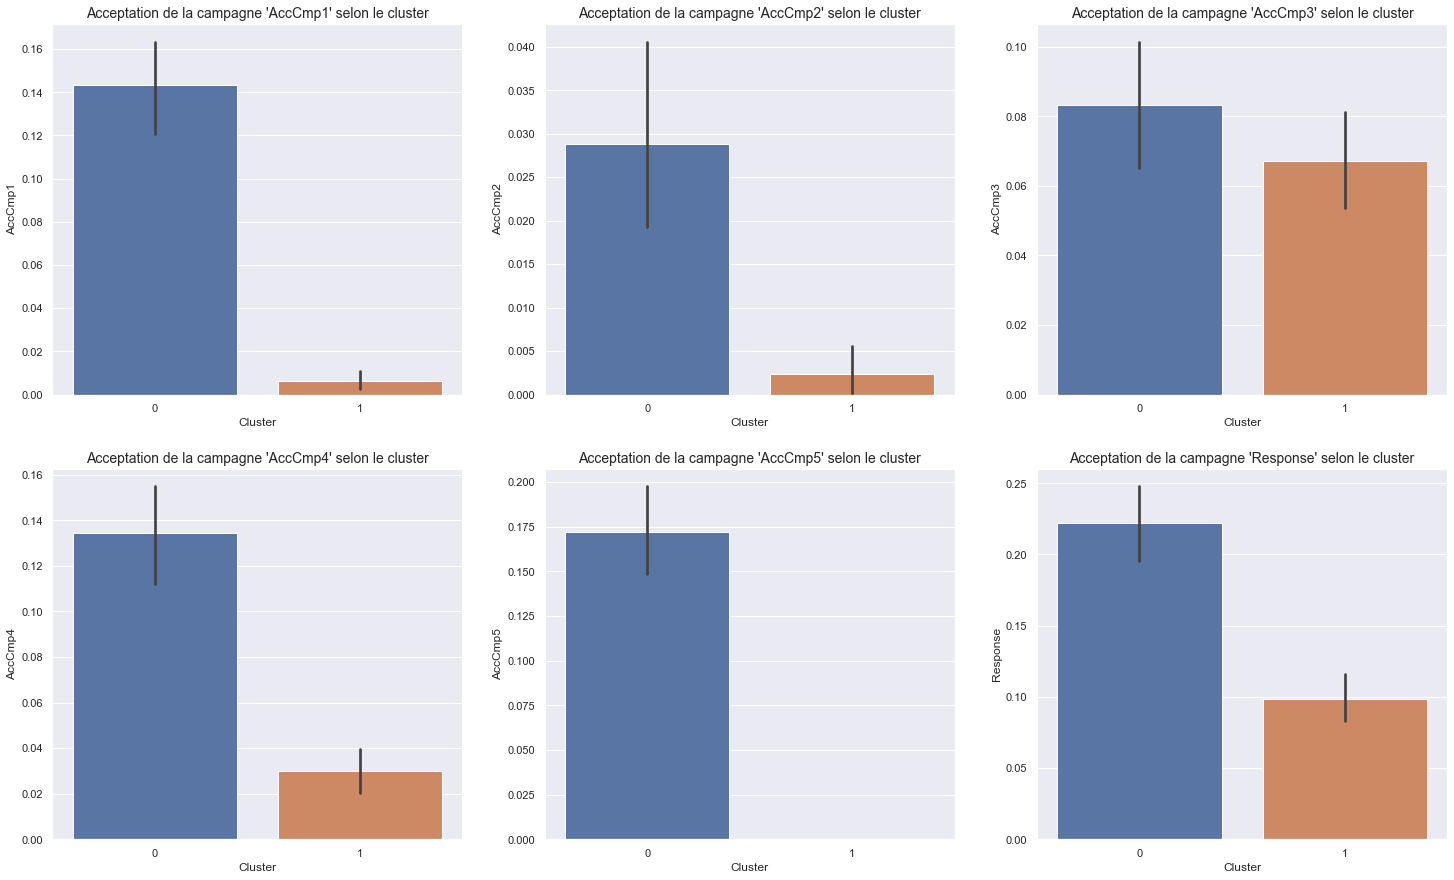

In [49]:
# Acceptation de campagnes
can = df_final[['AccCmp1', 'AccCmp2', 'AccCmp3', 'AccCmp4', 'AccCmp5','Response']]
plt.figure(figsize=(25,15))
for i, c in enumerate(can, 1):
    plt.subplot(2,3,i) 
    ax = sns.barplot(x='Cluster',y=c,data=df_final).set_title("Acceptation de la campagne '" + c + "' selon le cluster", fontsize=14)

plt.savefig('Graphiques/kmeans_cmpg.png', bbox_inches='tight');

In [50]:
# Moyen des variables numériques
gb_cn = df_final.groupby('Cluster')[feat_n].mean()
gb_cn

,Age,Days_Engaged,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,TotalPurch,DealsPurch,WebPurch,CatalogPurch,StorePurch,NumWebVisitsMonth,TotalAcc,Income
Cluster,,,,,,,,,,,,,,,,,
0,48.07,563.46,49.13,601.85,53.80,342.93,76.17,55.37,74.84,19.55,2.11,5.85,5.12,8.58,3.83,0.56,70628.97
1,44.65,522.45,48.91,88.22,6.20,34.33,9.44,6.30,21.40,7.43,2.44,2.82,0.82,3.80,6.42,0.11,37681.06


In [51]:
gb_mnt = df_final.groupby('Cluster')['MntTotal'].mean()
gb_mnt

Cluster
0   1204.96
1    165.88
Name: MntTotal, dtype: float64

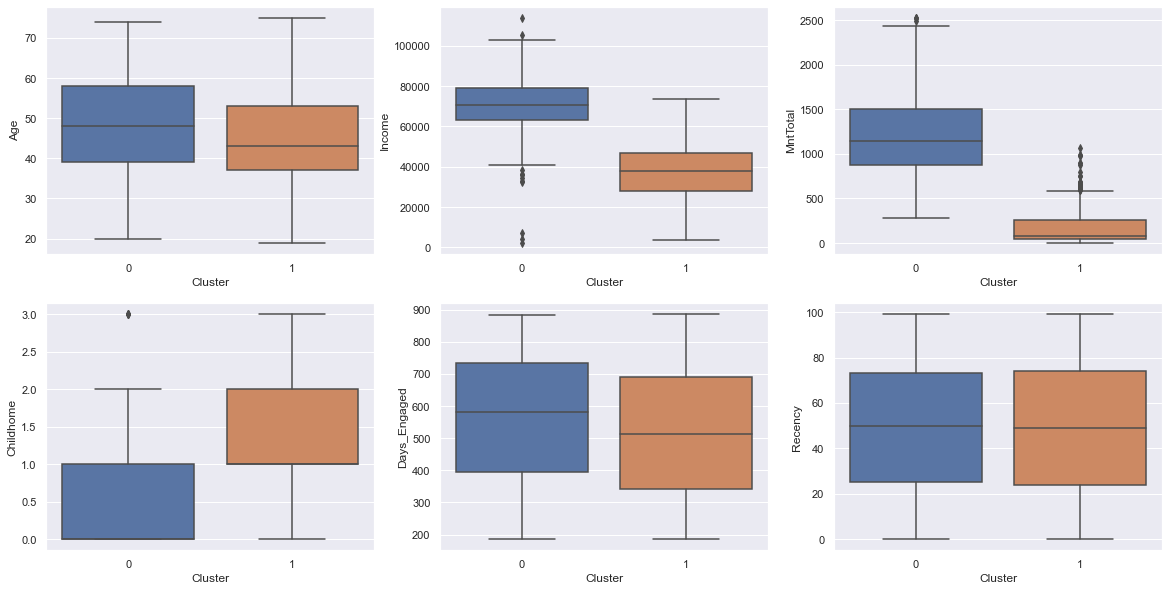

In [52]:
# Distribution des variables ['Age', 'Income', 'MntTotal', 'Childhome', 'Days_Engaged', 'Recency']
can = df_final[['Age', 'Income', 'MntTotal', 'Childhome', 'Days_Engaged', 'Recency']]
plt.figure(figsize=(20,10))
for i, c in enumerate(can, 1):
    plt.subplot(2,3,i) 
    ax = sns.boxplot(x='Cluster',y=c,data=df_final);

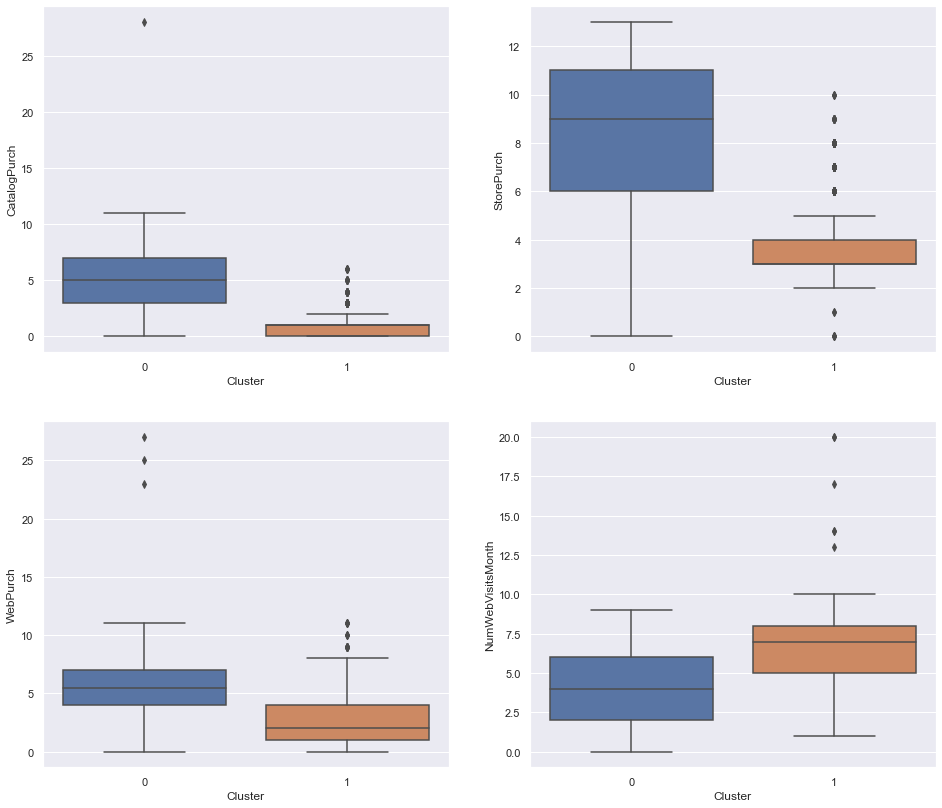

In [53]:
# Distribution des variables ['CatalogPurch', 'StorePurch', 'WebPurch', 'NumWebVisitsMonth']
can = df_final[['CatalogPurch', 'StorePurch', 'WebPurch', 'NumWebVisitsMonth']]
plt.figure(figsize=(16,14))
for i, c in enumerate(can, 1):
    plt.subplot(2,2,i) 
    ax = sns.boxplot(x='Cluster',y=c,data=df_final)
plt.savefig('Graphiques/kmeans_canaux.png', bbox_inches='tight');

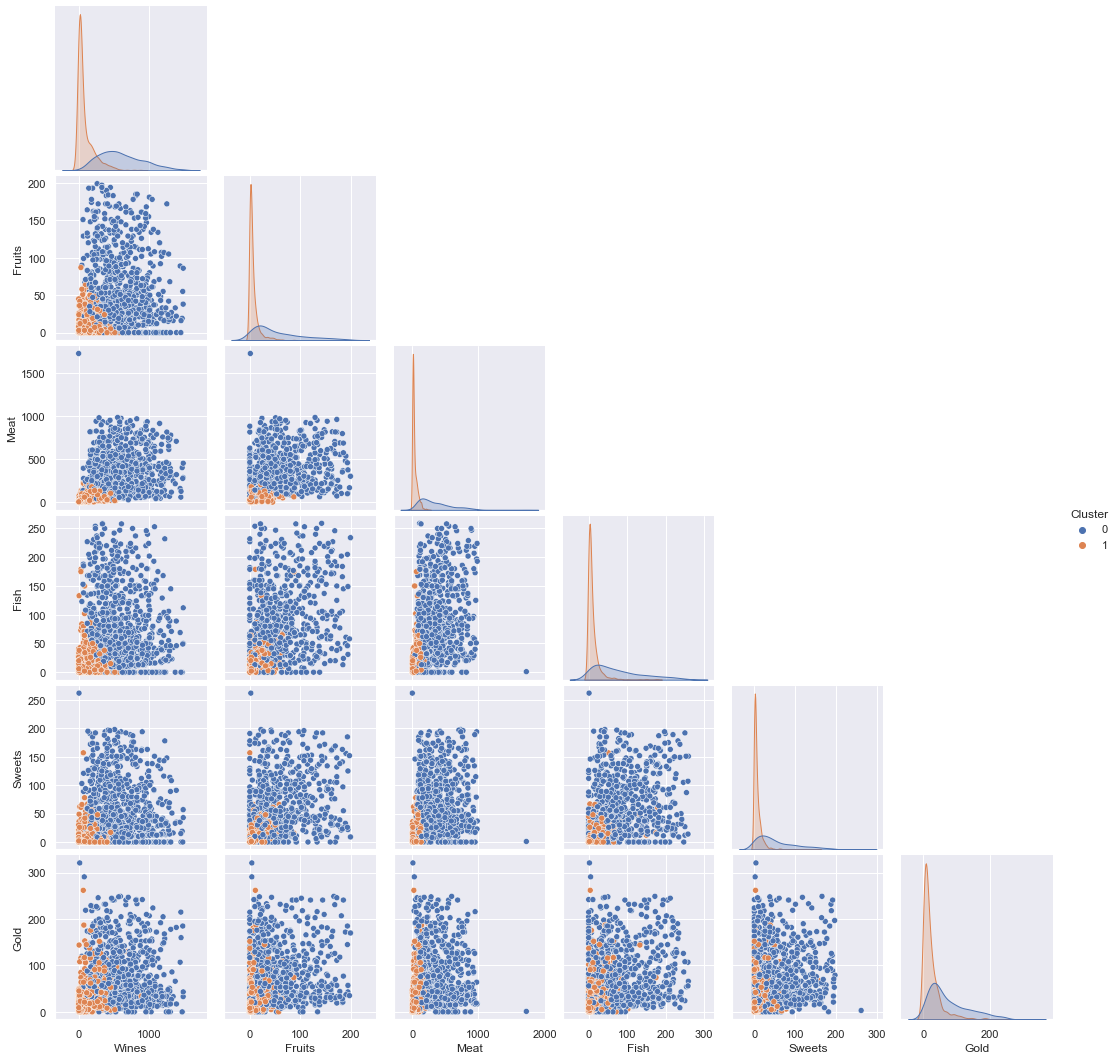

In [54]:
# Pairplot des variables ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
sns.pairplot(df_final, vars=['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'],
             hue='Cluster', corner=True);

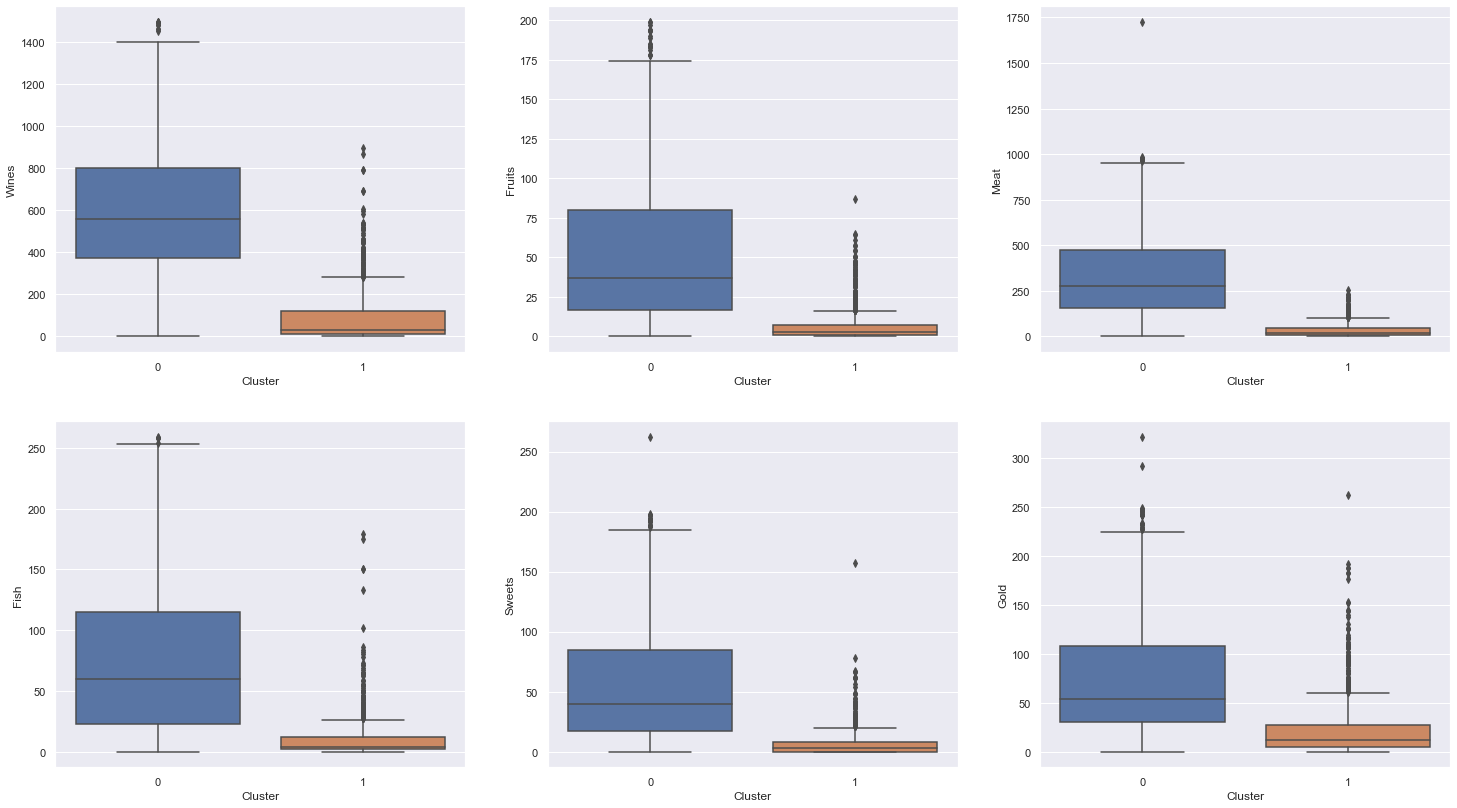

In [55]:
#Distribution des variables ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
can = df_final[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']]
plt.figure(figsize=(25,14))
for i, c in enumerate(can, 1):
    plt.subplot(2,3,i) 
    ax = sns.boxplot(x='Cluster',y=c,data=df_final)
plt.savefig('Graphiques/cluster_prod.png', bbox_inches='tight');

In [56]:
# Quantité d'enfants dans la maison par cluster.
cont_c_child = pd.crosstab(df_final['Cluster'],df_final['Childhome'])
cont_c_child_prop = pd.crosstab(df_final['Cluster'],df_final['Childhome'],normalize="index")

print(cont_c_child)
print('')
print(cont_c_child_prop)

Childhome    0    1    2   3
Cluster                     
0          486  396   49   5
1          140  716  365  45

Childhome    0    1    2    3
Cluster                      
0         0.52 0.42 0.05 0.01
1         0.11 0.57 0.29 0.04


Variables catégoriques (Education et Marital_Status) par cluster 

In [57]:
cont_c_educ = pd.crosstab(df_final['Cluster'],df_final['Education'])
cont_c_educ_prop = pd.crosstab(df_final['Cluster'],df_final['Education'],normalize="index")

print(cont_c_educ)
print('')
print(cont_c_educ_prop)

Education  Basic  Graduation  Master  PhD
Cluster                                  
0              1         492     219  224
1             53         619     343  251

Education  Basic  Graduation  Master  PhD
Cluster                                  
0           0.00        0.53    0.23 0.24
1           0.04        0.49    0.27 0.20


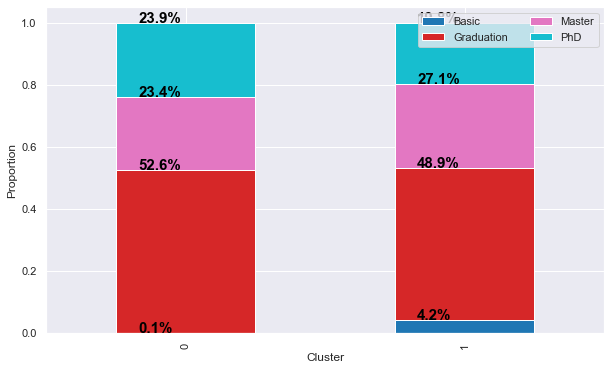

In [58]:
cont_c_educ_prop.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10, 6))
plt.legend(loc="best", ncol=2)
plt.xlabel("Cluster")
plt.ylabel("Proportion")

for n, x in enumerate([*cont_c_educ_prop.index.values]):
    for (proportion, y_loc) in zip(cont_c_educ_prop.loc[x],
                                   cont_c_educ_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=15,
                 fontweight="bold")

plt.show()

In [59]:
cont_c_ms = pd.crosstab(df_final['Cluster'],df_final['Marital_Status'])
cont_c_ms_prop = pd.crosstab(df_final['Cluster'],df_final['Marital_Status'], normalize="index")

print(cont_c_ms)
print('')
print(cont_c_ms_prop)

Marital_Status  Divorced  Married  Single  Together  Widow
Cluster                                                   
0                    106      355     197       234     44
1                    123      498     279       334     32

Marital_Status  Divorced  Married  Single  Together  Widow
Cluster                                                   
0                   0.11     0.38    0.21      0.25   0.05
1                   0.10     0.39    0.22      0.26   0.03


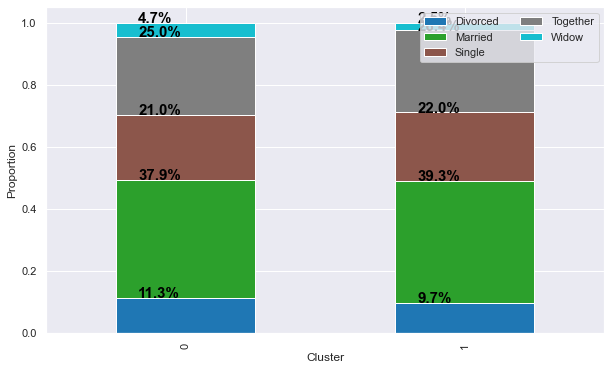

In [60]:
cont_c_ms_prop.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10, 6))
plt.legend(loc="best", ncol=2)
plt.xlabel("Cluster")
plt.ylabel("Proportion")

for n, x in enumerate([*cont_c_ms_prop.index.values]):
    for (proportion, y_loc) in zip(cont_c_ms_prop.loc[x],
                                   cont_c_ms_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=15,
                 fontweight="bold")

plt.show()